In [144]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

%load_ext autoreload
%autoreload 2
from models import LM

# Read in data
data = pd.read_csv("../../Data/csvs/full_data.csv")
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,lat,lon,pvo,irradiance,elevation,cvh,sd,msl,tcc,t2m,u100,v100,sf,tp
0,25.01,-80.86,4.806000,229.686570,-0.100000,0.0,0.0,101686.95,0.475711,298.03910,-2.719398,-0.084908,0.0,0.002281
1,25.01,-80.38,4.742417,227.823326,-5.324144,0.0,0.0,101687.93,0.483685,298.14987,-2.745007,-0.021706,0.0,0.002306
2,25.01,-80.46,4.754083,225.595268,-5.826279,0.0,0.0,101687.93,0.483685,298.14987,-2.745007,-0.021706,0.0,0.002306
3,25.01,-80.50,4.768333,229.447935,-1.299589,0.0,0.0,101687.93,0.483685,298.14987,-2.745007,-0.021706,0.0,0.002306
4,25.01,-80.58,4.764667,226.067122,-0.945366,0.0,0.0,101687.93,0.483685,298.14987,-2.745007,-0.021706,0.0,0.002306


In [145]:
# Prepare data
data_no_irr  = data.drop('irradiance', axis = 1)
y = data_no_irr['pvo']
X = data_no_irr.drop('pvo', axis = 1)
for col in X.columns:
    X[col] = (X[col] - X[col].mean()) / X[col].std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Convert to tensors
X_train = torch.tensor(X_train.values, dtype = torch.float32)
y_train = torch.tensor(y_train.values, dtype = torch.float32)
X_test = torch.tensor(X_test.values, dtype = torch.float32)
y_test = torch.tensor(y_test.values, dtype = torch.float32)

# SGD Optimizer Trained Model

In [146]:
model = LM()
model.train(X_train, y_train, X_test, y_test, epochs = 20)

Epoch: 1 | Loss: 0.010366053320467472
Epoch: 2 | Loss: 0.006632971577346325
Epoch: 3 | Loss: 0.02562534250319004
Epoch: 4 | Loss: 0.004845455754548311
Epoch: 5 | Loss: 0.01655249111354351
Epoch: 6 | Loss: 0.005969209596514702
Epoch: 7 | Loss: 0.0073984102346003056
Epoch: 8 | Loss: 0.0033437812235206366
Epoch: 9 | Loss: 0.008879217319190502
Epoch: 10 | Loss: 0.004920057952404022
Epoch: 11 | Loss: 0.012172087095677853
Epoch: 12 | Loss: 0.008674703538417816
Epoch: 13 | Loss: 0.01778021641075611
Epoch: 14 | Loss: 0.003408926771953702
Epoch: 15 | Loss: 0.013851120136678219
Epoch: 16 | Loss: 0.028691453859210014
Epoch: 17 | Loss: 0.006341589614748955
Epoch: 18 | Loss: 0.0054054297506809235
Epoch: 19 | Loss: 0.013045108877122402
Epoch: 20 | Loss: 0.00997841265052557


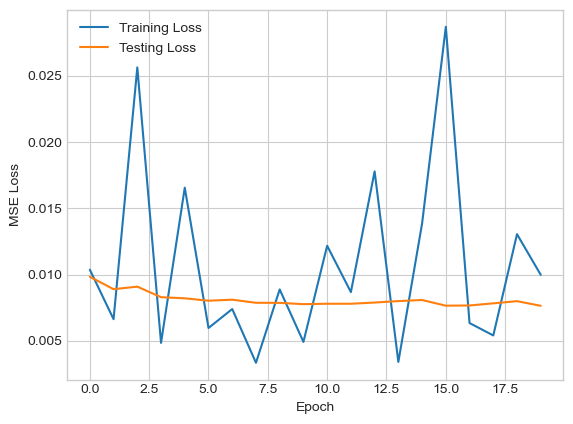

In [147]:
tr_loss, te_loss = model.loss()
plt.plot(tr_loss, label = 'Training Loss')
plt.plot(te_loss, label = 'Testing Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

In [148]:
device = model.device
mse_no_irr = ((model.predict(X_test.to(device))[:,0] - y_test.to(device))**2).mean()
print(f"Testing Data Loss (torch model - w/out irr.): {round(mse_no_irr.item(), 5)}")

Testing Data Loss (torch model - w/out irr.): 0.00764


### Replicating Procedure Above but Including Irradiance Feature

In [149]:
# Prepare data
data_irr = data
y = data_irr['pvo']
X = data_irr.drop('pvo', axis = 1)
for col in X.columns:
    X[col] = (X[col] - X[col].mean()) / X[col].std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Convert to tensors
X_train = torch.tensor(X_train.values, dtype = torch.float32)
y_train = torch.tensor(y_train.values, dtype = torch.float32)
X_test = torch.tensor(X_test.values, dtype = torch.float32)
y_test = torch.tensor(y_test.values, dtype = torch.float32)

model = LM(all_feats = True)
model.train(X_train, y_train, X_test, y_test, epochs = 20)

Epoch: 1 | Loss: 0.0033038391266018152
Epoch: 2 | Loss: 0.0056232851929962635
Epoch: 3 | Loss: 0.005684101954102516
Epoch: 4 | Loss: 0.0021276252809911966
Epoch: 5 | Loss: 0.0025277549866586924
Epoch: 6 | Loss: 0.0019385560881346464
Epoch: 7 | Loss: 0.004269755911082029
Epoch: 8 | Loss: 0.009401190094649792
Epoch: 9 | Loss: 0.002151966094970703
Epoch: 10 | Loss: 0.0167244803160429
Epoch: 11 | Loss: 0.0021127588115632534
Epoch: 12 | Loss: 0.005468584131449461
Epoch: 13 | Loss: 0.005589100997895002
Epoch: 14 | Loss: 0.017142442986369133
Epoch: 15 | Loss: 0.0024692045990377665
Epoch: 16 | Loss: 0.0013008300447836518
Epoch: 17 | Loss: 0.0014171558432281017
Epoch: 18 | Loss: 0.004290060605853796
Epoch: 19 | Loss: 0.0018693112069740891
Epoch: 20 | Loss: 0.01973823271691799


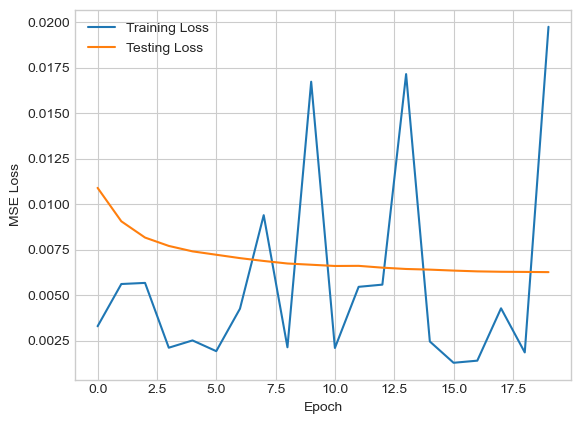

In [150]:
tr_loss, te_loss = model.loss()
plt.plot(tr_loss, label = 'Training Loss')
plt.plot(te_loss, label = 'Testing Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

In [155]:
device = model.device
mse_irr = ((model.predict(X_test.to(device))[:,0] - y_test.to(device))**2).mean()
print(f"Testing Data Loss (torch model - w/out irr.): {round(mse_no_irr.item(), 5)}")
print(f"Testing Data Loss (torch model - w/ irr.):    {round(mse_irr.item(), 5)}")

Testing Data Loss (torch model - w/out irr.): 0.00764
Testing Data Loss (torch model - w/ irr.):    0.00628


# Adam Optimizer Trained Model

/Users/colmcd/Desktop/S_25/CSCI 0451A/Final/solar-searcher/Notebooks/Models/models.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.loa

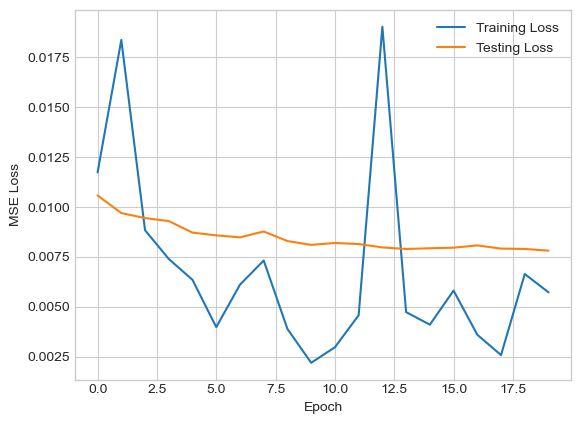

In [152]:
mod = LM()
mod.loadModel('../../Data/model/LM.pt.tar')
loss = np.loadtxt('../../Data/model/loss.txt')
tr_loss = loss[:,0]
te_loss = loss[:,1]
plt.plot(tr_loss, label = 'Training Loss')
plt.plot(te_loss, label = 'Testing Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

# `sklearn` Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train.cpu(), y_train.cpu())
preds = LR.predict(X_test)
mse_skl = ((preds - y_test.cpu().numpy())**2).mean()

print(f"Testing Data Loss (sklearn model):            {round(mse_skl.item(), 5)}")
print(f"Testing Data Loss (torch model - w/out irr.): {round(mse_no_irr.item(), 5)}")
print(f"Testing Data Loss (torch model - w/ irr.):    {round(mse_irr.item(), 5)}")

Testing Data Loss (sklearn model):            0.01044
Testing Data Loss (torch model - w/out irr.): 0.00764
Testing Data Loss (torch model - w/ irr.):    0.00628


In [154]:
# I'm not sure what all this code it and it might be accidental
if False:
    blank = LM()
    blank.predict(X_train)
    bmse = ((blank.predict(X_train)[:,0] - y_train)**2).sum().item()
    bmse
    mse = ((mod.predict(X_train)[:,0] - y_train)**2).mean()
    X_train = X_train.to(device)
    y_train = y_train.to(device)
    device =  "cuda" if torch.cuda.is_available() else "cpu"